In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [6]:
df = pd.read_csv('kidney_disease.csv')
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
## we treat null values to train the data correctly so that machine can predict the data correctly

In [10]:
df.drop('id',axis = 1,inplace = True)

In [11]:
df

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0    121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1      NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2    423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3    117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4    106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  
..     ...  ...  ...   ...  ...  ...  ...  ..   ...  ...  ...            ...  
395  140.0  ...   47  6700  4.9   no   no  no  good   no   no         notckd  
396   75.0  ...   54  7800  6.2   no   no  no  good   no   no         notckd  
397  100.0  ...   49  6600  5.4   no   no  no  good   no   no         notckd  
398  114.0  ...   51  7200  5.9   no   no  no  good   no   no         notckd  
399  131.0  ...   53  6800  6.1   no   no  no  good   no   no         notckd  

[400 rows x 25 columns]

In [12]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [13]:
df.columns = ['age','bp','specific_gravity','albumin','sugar','red blood count','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium','hb','packed_cell_volume','wbc','rc','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','pe','annemia','class']

In [14]:
df.isna().sum()

age                          9
bp                          12
specific_gravity            47
albumin                     46
sugar                       49
red blood count            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hb                          52
packed_cell_volume          70
wbc                        105
rc                         130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pe                           1
annemia                      1
class                        0
dtype: int64

In [15]:
df.columns

Index(['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 'red blood count',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hb',
       'packed_cell_volume', 'wbc', 'rc', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pe', 'annemia', 'class'],
      dtype='object')

In [16]:
df.describe()

age          bp  specific_gravity     albumin       sugar  \
count  391.000000  388.000000        353.000000  354.000000  351.000000   
mean    51.483376   76.469072          1.017408    1.016949    0.450142   
std     17.169714   13.683637          0.005717    1.352679    1.099191   
min      2.000000   50.000000          1.005000    0.000000    0.000000   
25%     42.000000   70.000000          1.010000    0.000000    0.000000   
50%     55.000000   80.000000          1.020000    0.000000    0.000000   
75%     64.500000   80.000000          1.020000    2.000000    0.000000   
max     90.000000  180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium          hb  
count  312.000000  348.000000  
mean     4.627244   12.526437  
std      3.193904    2.912587  
min      2.500000    3.100000  
25%      3.800000   10.300000  
50%      4.400000   12.650000  
75%      4.900000   15.000000  
max     47.000000   17.800000

In [17]:
df.dtypes

age                        float64
bp                         float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red blood count             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hb                         float64
packed_cell_volume          object
wbc                         object
rc                          object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pe                          object
annemia                     object
class                       object
dtype: object

In [18]:
df['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: object

In [19]:
df['packed_cell_volume'].isna().sum()

70

In [20]:
df['packed_cell_volume'].value_counts()

packed_cell_volume
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: count, dtype: int64

In [21]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors = 'coerce')

In [22]:
df['packed_cell_volume'].value_counts()

packed_cell_volume
41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
32.0    12
50.0    12
36.0    12
33.0    12
28.0    12
34.0    11
37.0    11
30.0     9
29.0     9
35.0     9
46.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
51.0     4
49.0     4
47.0     4
54.0     4
25.0     3
27.0     3
22.0     3
19.0     2
23.0     2
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
16.0     1
Name: count, dtype: int64

In [23]:
df['wbc'] = pd.to_numeric(df['wbc'],errors = 'coerce')

df['rc'] = pd.to_numeric(df['rc'],errors = 'coerce')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bp                       388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood count          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hb                       3

In [25]:
cat_cols=[col for col in df.columns if df[col].dtype == 'O']
num_cols=[col for col in df.columns if df[col].dtype != 'O']

In [26]:
cat_cols

['red blood count',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pe',
 'annemia',
 'class']

In [27]:
num_cols

['age',
 'bp',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hb',
 'packed_cell_volume',
 'wbc',
 'rc']

In [28]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")  ## gives all unique values of each column

red blood count has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

pe has ['no' 'yes' nan] values 

annemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



In [29]:
df['diabetes_mellitus'].replace(to_replace = {' yes':'yes','\tyes':'yes','\tno':'no'},inplace = True)

In [30]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [31]:
df['coronary_artery_disease'].replace(to_replace = '\tno',value = 'no',inplace = True)

In [32]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [33]:
df['class'].replace(to_replace = 'ckd\t',value = 'ckd',inplace = True)

In [34]:
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [35]:
df['class'] = df['class'].map({'ckd' : 0 , 'notckd':1})

In [36]:
df['class'].unique()

array([0, 1], dtype=int64)

In [37]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")  ## gives all unique values of each column

red blood count has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

pe has ['no' 'yes' nan] values 

annemia has ['no' 'yes' nan] values 

class has [0 1] values 



In [38]:
## univariate analysis

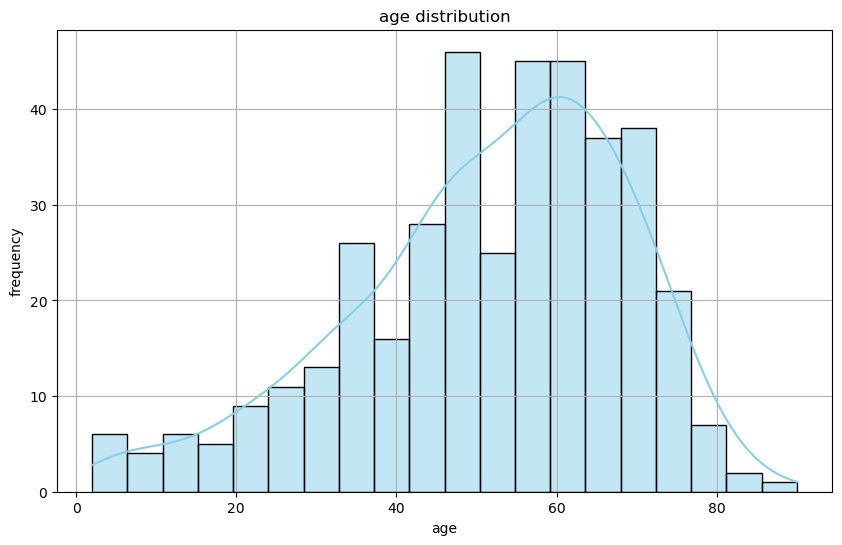

In [39]:
plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde = True,bins = 20 , color = 'skyblue')
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("age distribution")
plt.grid()
plt.show()

<Axes: xlabel='hypertension', ylabel='count'>

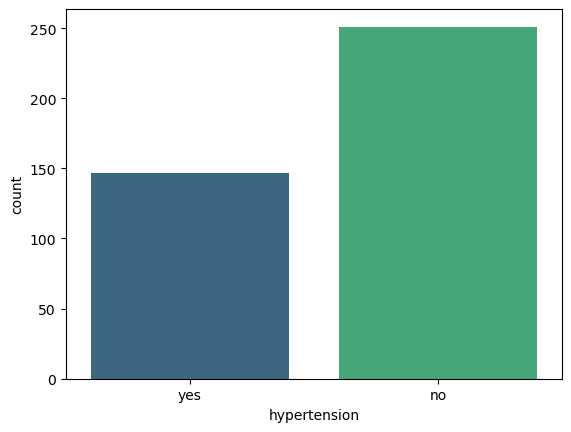

In [40]:
sns.countplot(x= 'hypertension',data = df,palette = 'viridis')

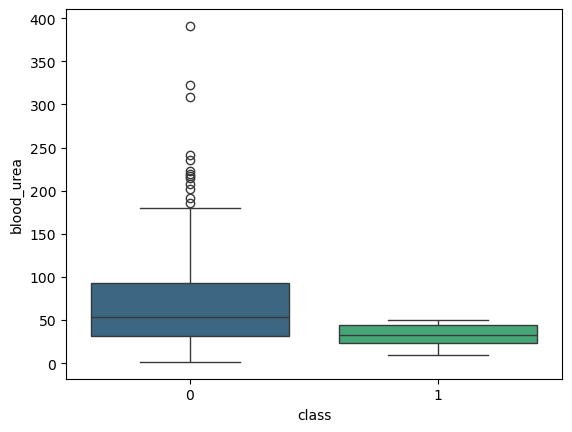

In [41]:
sns.boxplot(x= 'class', y = 'blood_urea', data = df,palette='viridis')
plt.show()

In [42]:
df['blood_urea']

0      36.0
1      18.0
2      53.0
3      56.0
4      26.0
       ... 
395    49.0
396    31.0
397    26.0
398    50.0
399    18.0
Name: blood_urea, Length: 400, dtype: float64

In [43]:
df1 = df.copy()

In [44]:
df1['blood_urea'].isna().sum()

19

In [45]:
df1.dropna(inplace = True)

In [46]:
df1['blood_urea'].isna().sum()

0

In [47]:
Q1 = df1['blood_urea'].quantile(0.25)
Q3 = df1['blood_urea'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[(df['blood_urea'] >= lower_bound) & (df['blood_urea'] <= upper_bound)]

In [48]:
df_clean

age    bp  specific_gravity  albumin  sugar red blood count  pus_cell  \
0    48.0  80.0             1.020      1.0    0.0             NaN    normal   
1     7.0  50.0             1.020      4.0    0.0             NaN    normal   
2    62.0  80.0             1.010      2.0    3.0          normal    normal   
3    48.0  70.0             1.005      4.0    0.0          normal  abnormal   
4    51.0  80.0             1.010      2.0    0.0          normal    normal   
..    ...   ...               ...      ...    ...             ...       ...   
395  55.0  80.0             1.020      0.0    0.0          normal    normal   
396  42.0  70.0             1.025      0.0    0.0          normal    normal   
397  12.0  80.0             1.020      0.0    0.0          normal    normal   
398  17.0  60.0             1.025      0.0    0.0          normal    normal   
399  58.0  80.0             1.025      0.0    0.0          normal    normal   

    pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0        notpresent  notpresent                 121.0  ...   
1        notpresent  notpresent                   NaN  ...   
2        notpresent  notpresent                 423.0  ...   
3           present  notpresent                 117.0  ...   
4        notpresent  notpresent                 106.0  ...   
..              ...         ...                   ...  ...   
395      notpresent  notpresent                 140.0  ...   
396      notpresent  notpresent                  75.0  ...   
397      notpresent  notpresent                 100.0  ...   
398      notpresent  notpresent                 114.0  ...   
399      notpresent  notpresent                 131.0  ...   

     packed_cell_volume     wbc   rc  hypertension  diabetes_mellitus  \
0                  44.0  7800.0  5.2           yes                yes   
1                  38.0  6000.0  NaN            no                 no   
2                  31.0  7500.0  NaN            no                yes   
3                  32.0  6700.0  3.9           yes                 no   
4                  35.0  7300.0  4.6            no                 no   
..                  ...     ...  ...           ...                ...   
395                47.0  6700.0  4.9            no                 no   
396                54.0  7800.0  6.2            no                 no   
397                49.0  6600.0  5.4            no                 no   
398                51.0  7200.0  5.9            no                 no   
399                53.0  6800.0  6.1            no                 no   

     coronary_artery_disease  appetite   pe annemia class  
0                         no      good   no      no     0  
1                         no      good   no      no     0  
2                         no      poor   no     yes     0  
3                         no      poor  yes     yes     0  
4                         no      good   no      no     0  
..                       ...       ...  ...     ...   ...  
395                       no      good   no      no     1  
396                       no      good   no      no     1  
397                       no      good   no      no     1  
398                       no      good   no      no     1  
399                       no      good   no      no     1  

[311 rows x 25 columns]

<Axes: xlabel='blood_urea'>

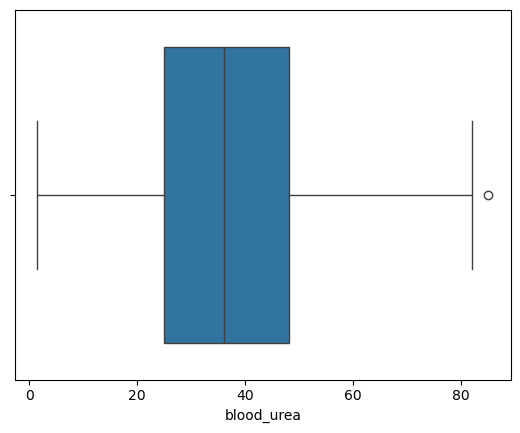

In [49]:
sns.boxplot(data = df_clean,x='blood_urea')

In [50]:
#from scipy.stats.mstats import winsorize

In [51]:
#wnsr = winsorize(df['blood_urea'],(0.5,0.5))
#wnsr

In [52]:
df = df_clean

<Axes: xlabel='class', ylabel='serum_creatinine'>

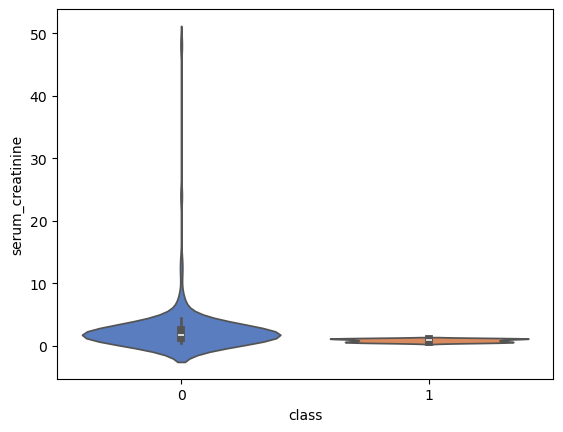

In [53]:
sns.violinplot(x='class',y = 'serum_creatinine',data = df,palette = 'muted')

<Axes: xlabel='annemia', ylabel='count'>

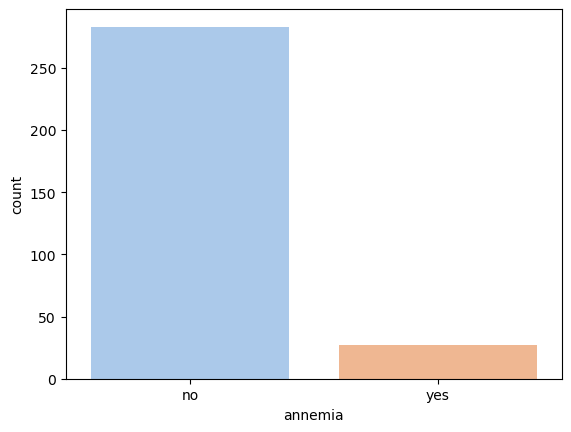

In [54]:
sns.countplot(x='annemia',data = df,palette='pastel')

In [55]:
df.columns

Index(['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 'red blood count',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hb',
       'packed_cell_volume', 'wbc', 'rc', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pe', 'annemia', 'class'],
      dtype='object')

<Axes: ylabel='count'>

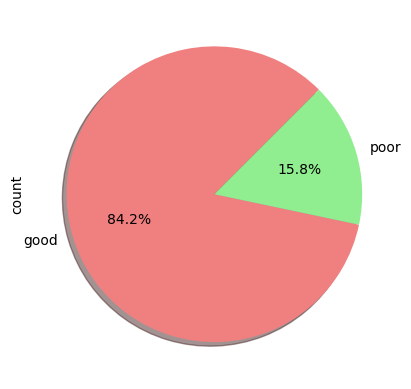

In [56]:
df.appetite.value_counts().plot.pie(autopct="%1.1f%%",colors = ['lightcoral','lightgreen'],startangle = 45,shadow = True )

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

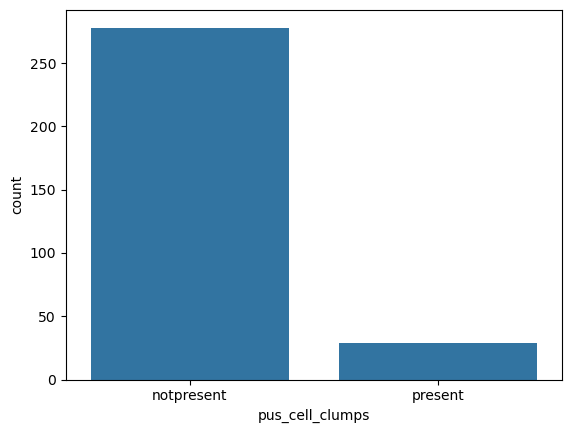

In [57]:
sns.countplot(x = 'pus_cell_clumps' , data = df)

<Axes: xlabel='wbc', ylabel='Count'>

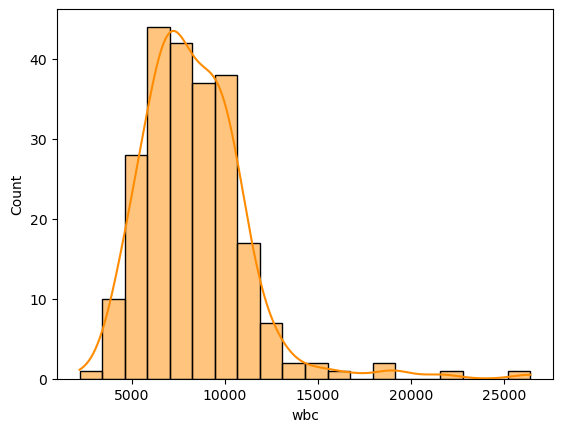

In [58]:
sns.histplot(df['wbc'],bins = 20 , kde = True,color = 'darkorange')

<Axes: ylabel='count'>

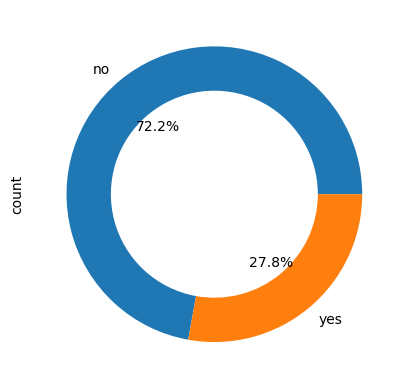

In [59]:
## donut chart

df['diabetes_mellitus'].value_counts().plot.pie(autopct = '%1.1f%%', wedgeprops = dict(width = 0.3))

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

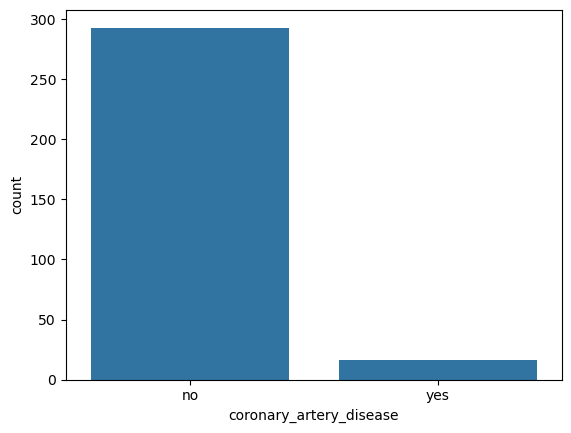

In [60]:
sns.countplot(x ='coronary_artery_disease',data = df)

<Axes: xlabel='pe', ylabel='count'>

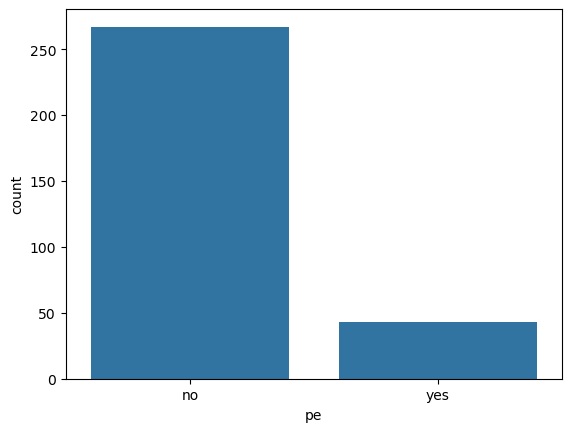

In [61]:
sns.countplot(x = 'pe',data = df)

<Axes: xlabel='bacteria', ylabel='count'>

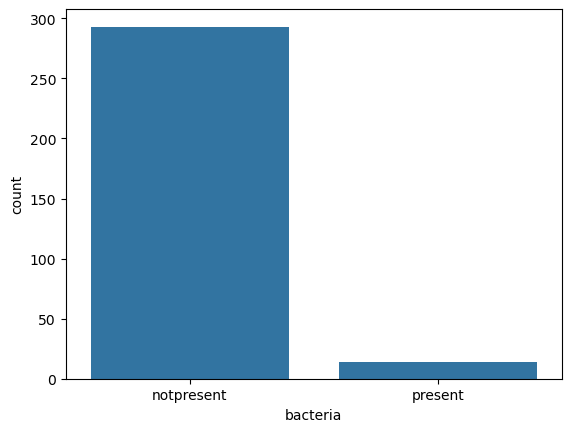

In [62]:
sns.countplot(x = 'bacteria',data = df)

<Axes: xlabel='bp', ylabel='age'>

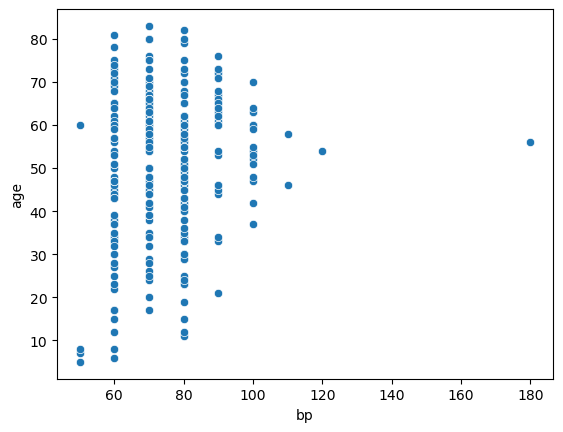

In [63]:
## bivariate analysis

sns.scatterplot(x = 'bp' , y='age',data = df)

<Axes: xlabel='age', ylabel='bp'>

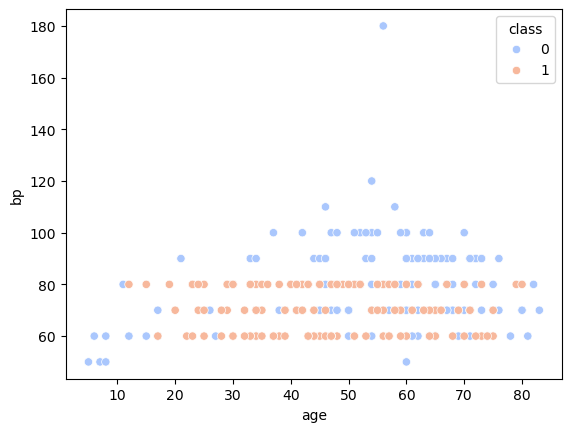

In [64]:
sns.scatterplot(x = 'age',y = 'bp',hue = 'class' , data = df,palette = 'coolwarm')

In [65]:
## insight as age is increasing bp is also increasing


<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

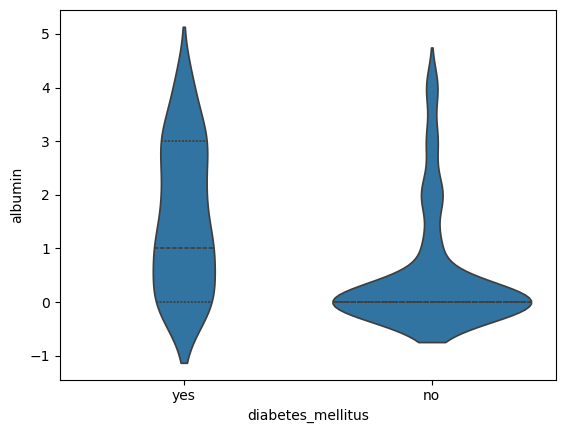

In [66]:
sns.violinplot(x = 'diabetes_mellitus' , y = 'albumin' , data =  df,inner = 'quartile')

In [67]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'],df['hypertension'])

<Axes: xlabel='diabetes_mellitus'>

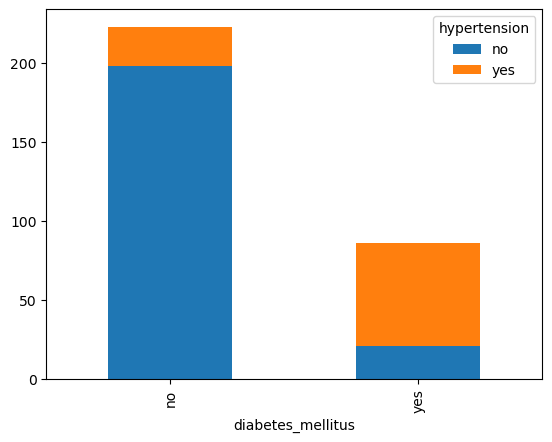

In [68]:
diabetes_hypertension.plot(kind = 'bar' , stacked = True)

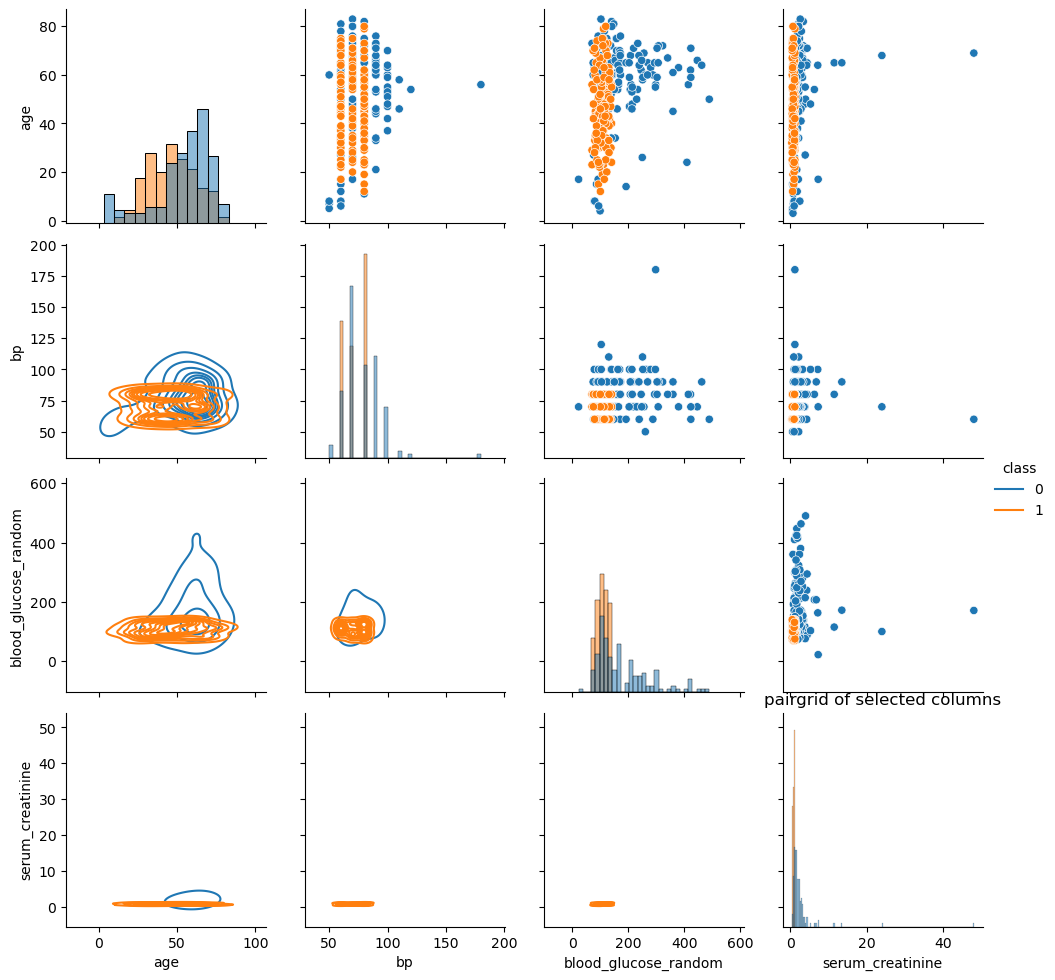

In [69]:
cols = ['age' ,'bp','blood_glucose_random','serum_creatinine','class']
g = sns.PairGrid(df[cols],hue = 'class' )
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot , cmap = ' blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title("pairgrid of selected columns")
plt.show()

In [70]:
df.columns

Index(['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 'red blood count',
       'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hb',
       'packed_cell_volume', 'wbc', 'rc', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pe', 'annemia', 'class'],
      dtype='object')

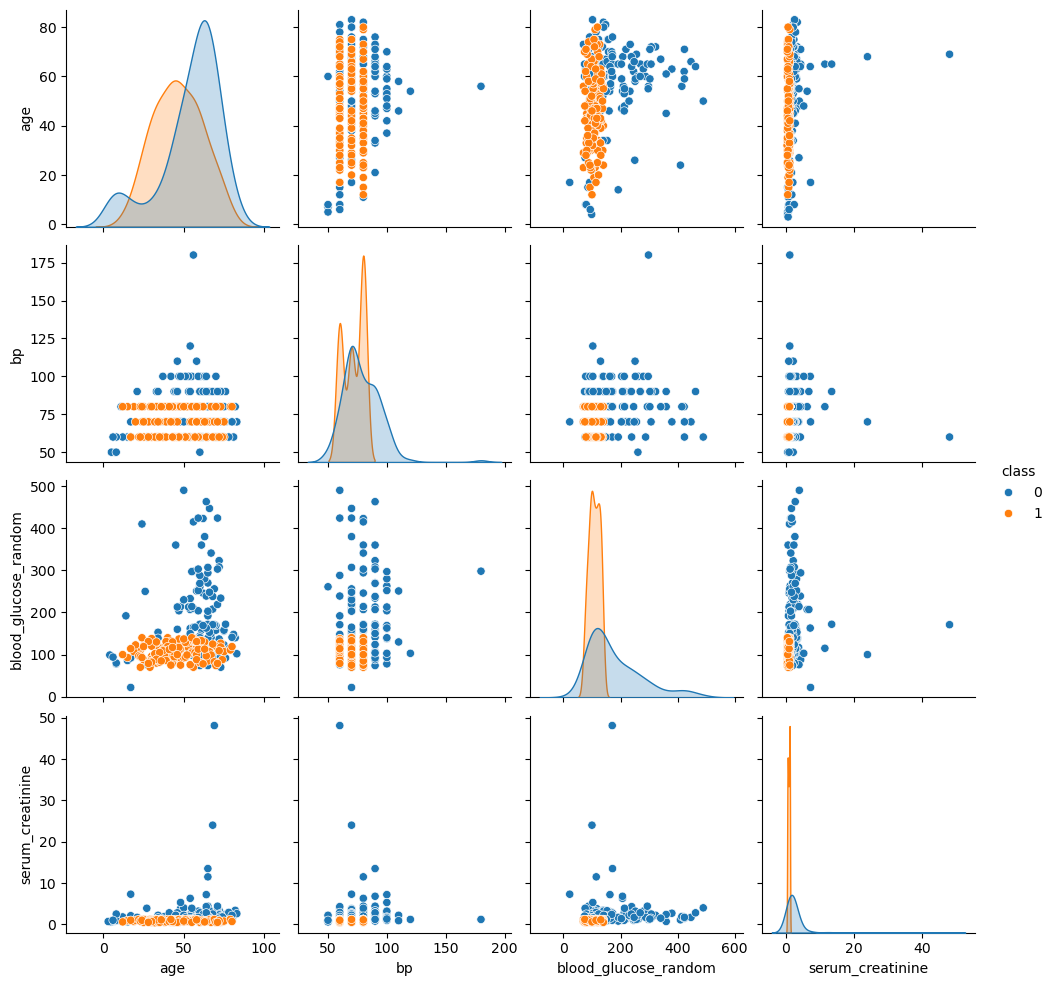

In [71]:
cols = ['age' ,'bp','blood_glucose_random','serum_creatinine','class']
sns.pairplot(df[cols],hue = 'class')


In [72]:
df.corr(numeric_only = True)

age        bp  specific_gravity   albumin  \
age                   1.000000  0.155157         -0.202965  0.080478   
bp                    0.155157  1.000000         -0.222187  0.103821   
specific_gravity     -0.202965 -0.222187          1.000000 -0.456407   
albumin               0.080478  0.103821         -0.456407  1.000000   
sugar                 0.213581  0.253907         -0.286523  0.234039   
blood_glucose_random  0.254665  0.207939         -0.390907  0.358726   
blood_urea            0.299792  0.063576         -0.267539  0.355626   
serum_creatinine      0.168567  0.021236         -0.338481  0.269424   
sodium               -0.109025 -0.022806          0.431049 -0.393085   
potassium             0.102113  0.062758          0.108881  0.010311   
hb                   -0.203927 -0.219319          0.618837 -0.600340   
packed_cell_volume   -0.270106 -0.252457          0.600627 -0.547778   
wbc                   0.082990  0.117911         -0.214366  0.302825   
rc                   -0.337334 -0.189349          0.567013 -0.493071   
class                -0.221489 -0.261732          0.743814 -0.625355   

                         sugar  blood_glucose_random  blood_urea  \
age                   0.213581              0.254665    0.299792   
bp                    0.253907              0.207939    0.063576   
specific_gravity     -0.286523             -0.390907   -0.267539   
albumin               0.234039              0.358726    0.355626   
sugar                 1.000000              0.744066    0.102115   
blood_glucose_random  0.744066              1.000000    0.183910   
blood_urea            0.102115              0.183910    1.000000   
serum_creatinine      0.130721              0.097517    0.186442   
sodium               -0.122372             -0.284359   -0.217806   
potassium             0.080374              0.030315    0.290946   
hb                   -0.253630             -0.378149   -0.435872   
packed_cell_volume   -0.251386             -0.359059   -0.427535   
wbc                   0.180517              0.100816    0.161698   
rc                   -0.176521             -0.315325   -0.424932   
class                -0.363590             -0.459702   -0.291558   

                      serum_creatinine    sodium  potassium        hb  \
age                           0.168567 -0.109025   0.102113 -0.203927   
bp                            0.021236 -0.022806   0.062758 -0.219319   
specific_gravity             -0.338481  0.431049   0.108881  0.618837   
albumin                       0.269424 -0.393085   0.010311 -0.600340   
sugar                         0.130721 -0.122372   0.080374 -0.253630   
blood_glucose_random          0.097517 -0.284359   0.030315 -0.378149   
blood_urea                    0.186442 -0.217806   0.290946 -0.435872   
serum_creatinine              1.000000 -0.359030   0.108538 -0.358126   
sodium                       -0.359030  1.000000   0.124307  0.396361   
potassium                     0.108538  0.124307   1.000000 -0.096923   
hb                           -0.358126  0.396361  -0.096923  1.000000   
packed_cell_volume           -0.352528  0.416921  -0.160920  0.831065   
wbc                           0.135976 -0.050663   0.008262 -0.296365   
rc                           -0.447091  0.348775  -0.113117  0.724243   
class                        -0.255386  0.461140   0.006900  0.780328   

                      packed_cell_volume       wbc        rc     class  
age                            -0.270106  0.082990 -0.337334 -0.221489  
bp                             -0.252457  0.117911 -0.189349 -0.261732  
specific_gravity                0.600627 -0.214366  0.567013  0.743814  
albumin                        -0.547778  0.302825 -0.493071 -0.625355  
sugar                          -0.251386  0.180517 -0.176521 -0.363590  
blood_glucose_random           -0.359059  0.100816 -0.315325 -0.459702  
blood_urea                     -0.427535  0.161698 -0.424932 -0.291558  
serum_creatinine               -

<Axes: >

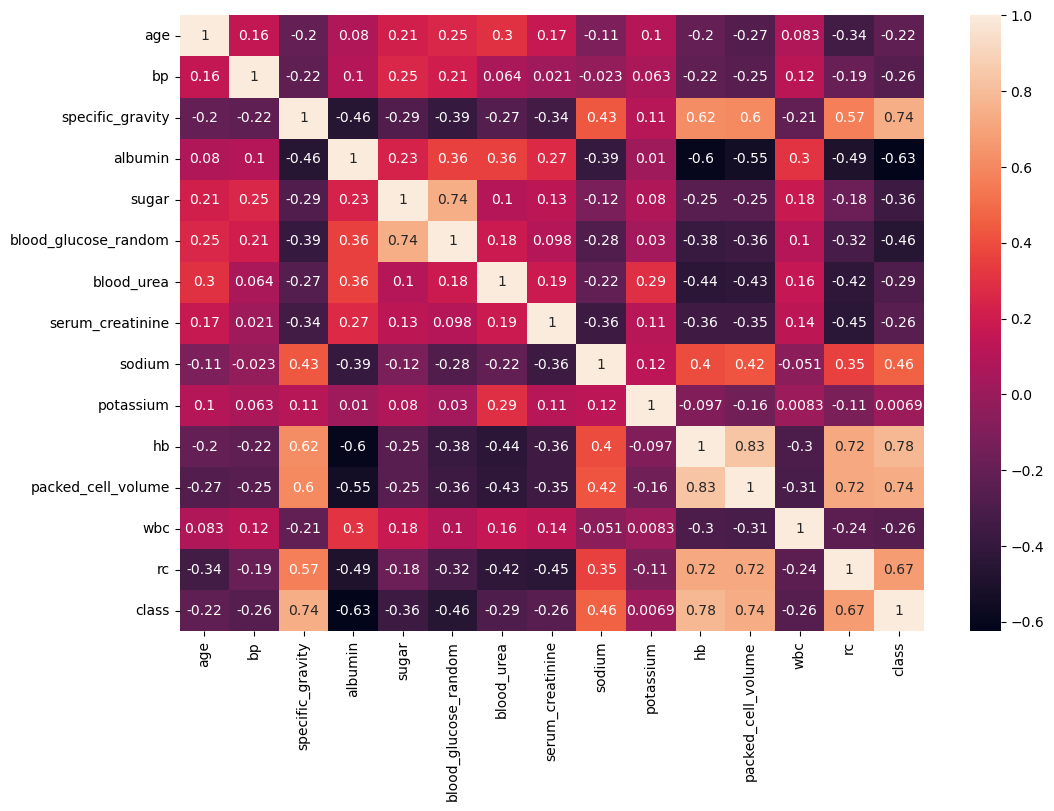

In [73]:
corr= df.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sns.heatmap(corr,annot = True)

<Axes: xlabel='diabetes_mellitus', ylabel='age'>

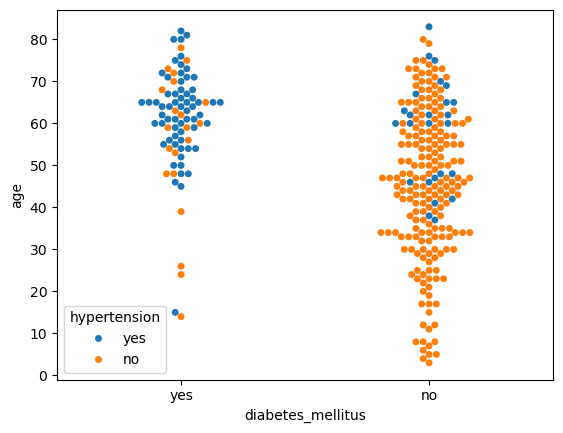

In [74]:
sns.swarmplot(x = 'diabetes_mellitus' , y = 'age' , hue = 'hypertension' , data = df)

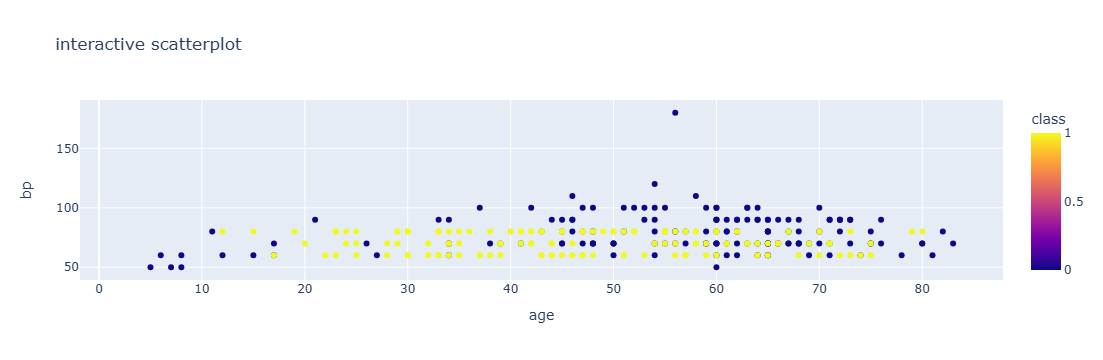

In [75]:
fig = px.scatter(df,x = 'age' , y = 'bp',color = 'class' , hover_data = ['serum_creatinine' , 'hb'],title = 'interactive scatterplot')
fig.show()

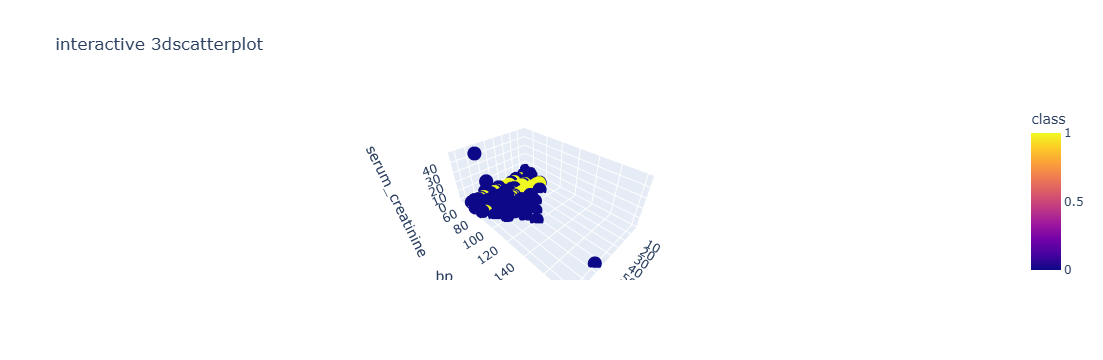

In [76]:
fig = px.scatter_3d(df,x = 'age' , y = 'bp',z = 'serum_creatinine' , color = 'class' ,title = 'interactive 3dscatterplot')
fig.show()

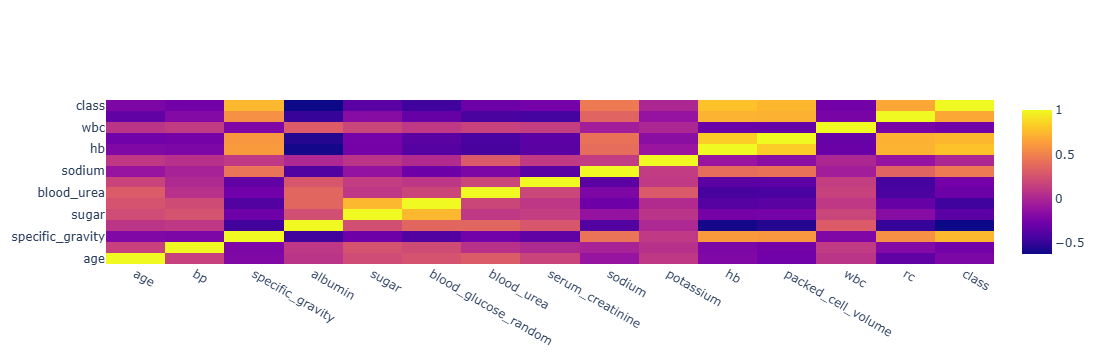

In [77]:
import plotly.graph_objects as go
data_corr = df.corr(numeric_only = True)
fig = go.Figure(data = go.Heatmap(z = data_corr.values,x = data_corr.columns,y = data_corr.index))
fig.show()

In [78]:
num_cols

['age',
 'bp',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hb',
 'packed_cell_volume',
 'wbc',
 'rc']

In [79]:
# replace with median

median_values = df[num_cols].median()
median_values

age                       54.00
bp                        70.00
specific_gravity           1.02
albumin                    0.00
sugar                      0.00
blood_glucose_random     119.00
blood_urea                36.00
serum_creatinine           1.20
sodium                   140.00
potassium                  4.30
hb                        13.60
packed_cell_volume        42.00
wbc                     8000.00
rc                         4.95
dtype: float64

In [80]:
df[num_cols] = df[num_cols].fillna(median_values)

In [81]:
df[num_cols].isna().sum()

age                     0
bp                      0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hb                      0
packed_cell_volume      0
wbc                     0
rc                      0
dtype: int64

In [82]:
mode_values = df.mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values)

In [83]:
df[cat_cols].isna().sum()

red blood count            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pe                         0
annemia                    0
class                      0
dtype: int64

In [84]:
## encoding

from sklearn.preprocessing import LabelEncoder

In [85]:
LabelEncoder = LabelEncoder()
for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [86]:
df[col]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 311, dtype: int64

In [87]:
df.head()

age    bp  specific_gravity  albumin  sugar  red blood count  pus_cell  \
0  48.0  80.0             1.020      1.0    0.0                1         1   
1   7.0  50.0             1.020      4.0    0.0                1         1   
2  62.0  80.0             1.010      2.0    3.0                1         1   
3  48.0  70.0             1.005      4.0    0.0                1         0   
4  51.0  80.0             1.010      2.0    0.0                1         1   

   pus_cell_clumps  bacteria  blood_glucose_random  ...  packed_cell_volume  \
0                0         0                 121.0  ...                44.0   
1                0         0                 119.0  ...                38.0   
2                0         0                 423.0  ...                31.0   
3                1         0                 117.0  ...                32.0   
4                0         0                 106.0  ...                35.0   

      wbc    rc  hypertension  diabetes_mellitus  coronary_artery_disease  \
0  7800.0  5.20             1                  1                        0   
1  6000.0  4.95             0                  0                        0   
2  7500.0  4.95             0                  1                        0   
3  6700.0  3.90             1                  0                        0   
4  7300.0  4.60             0                  0                        0   

   appetite  pe  annemia  class  
0         0   0        0      0  
1         0   0        0      0  
2         1   0        1      0  
3         1   1        1      0  
4         0   0        0      0  

[5 rows x 25 columns]

In [88]:
X = df.drop('class',axis =1)
y = df['class']

In [89]:
X

age    bp  specific_gravity  albumin  sugar  red blood count  pus_cell  \
0    48.0  80.0             1.020      1.0    0.0                1         1   
1     7.0  50.0             1.020      4.0    0.0                1         1   
2    62.0  80.0             1.010      2.0    3.0                1         1   
3    48.0  70.0             1.005      4.0    0.0                1         0   
4    51.0  80.0             1.010      2.0    0.0                1         1   
..    ...   ...               ...      ...    ...              ...       ...   
395  55.0  80.0             1.020      0.0    0.0                1         1   
396  42.0  70.0             1.025      0.0    0.0                1         1   
397  12.0  80.0             1.020      0.0    0.0                1         1   
398  17.0  60.0             1.025      0.0    0.0                1         1   
399  58.0  80.0             1.025      0.0    0.0                1         1   

     pus_cell_clumps  bacteria  blood_glucose_random  ...    hb  \
0                  0         0                 121.0  ...  15.4   
1                  0         0                 119.0  ...  11.3   
2                  0         0                 423.0  ...   9.6   
3                  1         0                 117.0  ...  11.2   
4                  0         0                 106.0  ...  11.6   
..               ...       ...                   ...  ...   ...   
395                0         0                 140.0  ...  15.7   
396                0         0                  75.0  ...  16.5   
397                0         0                 100.0  ...  15.8   
398                0         0                 114.0  ...  14.2   
399                0         0                 131.0  ...  15.8   

     packed_cell_volume     wbc    rc  hypertension  diabetes_mellitus  \
0                  44.0  7800.0  5.20             1                  1   
1                  38.0  6000.0  4.95             0                  0   
2                  31.0  7500.0  4.95             0                  1   
3                  32.0  6700.0  3.90             1                  0   
4                  35.0  7300.0  4.60             0                  0   
..                  ...     ...   ...           ...                ...   
395                47.0  6700.0  4.90             0                  0   
396                54.0  7800.0  6.20             0                  0   
397                49.0  6600.0  5.40             0                  0   
398                51.0  7200.0  5.90             0                  0   
399                53.0  6800.0  6.10             0                  0   

     coronary_artery_disease  appetite  pe  annemia  
0                          0         0   0        0  
1                          0         0   0        0  
2                          0         1   0        1  
3                          0         1   1        1  
4                          0         0   0        0  
..                       ...       ...  ..      ...  
395                        0         0   0        0  
396                        0         0   0        0  
397                        0         0   0        0  
398                        0         0   0        0  
399                        0         0   0        0  

[311 rows x 24 columns]

In [90]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 311, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
x_train

age    bp  specific_gravity  albumin  sugar  red blood count  pus_cell  \
0    48.0  80.0             1.020      1.0    0.0                1         1   
272  56.0  80.0             1.025      0.0    0.0                1         1   
166  27.0  60.0             1.020      0.0    0.0                1         1   
95   62.0  90.0             1.015      1.0    0.0                1         1   
180  73.0  90.0             1.010      1.0    4.0                0         0   
..    ...   ...               ...      ...    ...              ...       ...   
288  56.0  70.0             1.025      0.0    0.0                1         1   
343  37.0  60.0             1.025      0.0    0.0                1         1   
109  54.0  70.0             1.020      0.0    0.0                1         1   
322  70.0  60.0             1.020      0.0    0.0                1         1   
53   62.0  80.0             1.015      0.0    5.0                1         1   

     pus_cell_clumps  bacteria  blood_glucose_random  ...    hb  \
0                  0         0                 121.0  ...  15.4   
272                0         0                 139.0  ...  14.8   
166                0         0                  76.0  ...  13.6   
95                 0         0                  94.0  ...  13.6   
180                1         0                 234.0  ...  10.3   
..               ...       ...                   ...  ...   ...   
288                0         0                  70.0  ...  15.9   
343                0         0                 111.0  ...  16.2   
109                0         0                 233.0  ...  11.7   
322                0         0                 120.0  ...  16.0   
53                 0         0                 246.0  ...  13.6   

     packed_cell_volume      wbc    rc  hypertension  diabetes_mellitus  \
0                  44.0   7800.0  5.20             1                  1   
272                42.0   5600.0  5.50             0                  0   
166                42.0   8000.0  4.95             0                  0   
95                 42.0   8000.0  4.95             1                  0   
180                28.0   8000.0  4.95             0                  1   
..                  ...      ...   ...           ...                ...   
288                50.0  11000.0  5.10             0                  0   
343                50.0   5500.0  5.70             0                  0   
109                42.0   8000.0  4.95             0                  1   
322                43.0   4500.0  4.90             0                  0   
53                 40.0   8500.0  4.70             1                  1   

     coronary_artery_disease  appetite  pe  annemia  
0                          0         0   0        0  
272                        0         0   0        0  
166                        0         1   1        1  
95                         0         0   1        1  
180                        0         0   0        0  
..                       ...       ...  ..      ...  
288                        0         0   0        0  
343                        0         0   0        0  
109                        0         0   0        0  
322                        0         0   0        0  
53                         0         0   0        0  

[248 rows x 24 columns]

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression()

In [95]:
model.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [97]:
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [98]:
model.predict_proba(x_test)

array([[9.94055412e-01, 5.94458757e-03],
       [7.73188682e-01, 2.26811318e-01],
       [2.79621667e-02, 9.72037833e-01],
       [1.29651385e-01, 8.70348615e-01],
       [9.99466703e-01, 5.33297255e-04],
       [1.28023753e-01, 8.71976247e-01],
       [2.48512015e-02, 9.75148798e-01],
       [3.97574861e-01, 6.02425139e-01],
       [9.47666895e-01, 5.23331054e-02],
       [5.38843656e-01, 4.61156344e-01],
       [6.85300574e-01, 3.14699426e-01],
       [3.75293241e-01, 6.24706759e-01],
       [9.99926901e-01, 7.30991301e-05],
       [7.42712365e-01, 2.57287635e-01],
       [9.15945469e-01, 8.40545309e-02],
       [9.76352216e-01, 2.36477836e-02],
       [2.61184368e-03, 9.97388156e-01],
       [5.79174823e-01, 4.20825177e-01],
       [1.73959469e-01, 8.26040531e-01],
       [9.93477886e-01, 6.52211393e-03],
       [4.31980122e-02, 9.56801988e-01],
       [7.89988791e-03, 9.92100112e-01],
       [4.83797978e-01, 5.16202022e-01],
       [1.34275033e-02, 9.86572497e-01],
       [9.999448

In [99]:
model.coef_

array([[ 0.00407675, -0.07079376, -0.00110862, -0.09369298, -0.0066458 ,
         0.00808737,  0.01446098, -0.00933733, -0.00411465, -0.03541709,
         0.01549037, -0.10157597, -0.03807645,  0.0079929 ,  0.15668719,
         0.35507343, -0.00038145,  0.03107675, -0.02754507, -0.023177  ,
        -0.00413299, -0.01495418, -0.02160161, -0.00884047]])

In [100]:
model.intercept_

array([-0.00155734])

In [101]:
accuracy_score(y_test,y_pred)

0.746031746031746

In [102]:
precision_score(y_test,y_pred)

0.7419354838709677

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        32
           1       0.74      0.74      0.74        31

    accuracy                           0.75        63
   macro avg       0.75      0.75      0.75        63
weighted avg       0.75      0.75      0.75        63



# Model is giving an accuracy of 75% 

In [106]:
from sklearn.metrics import roc_curve,auc

In [109]:
y_pred_model = model.predict_proba(x_test)[:,1]
y_pred_model

array([5.94458757e-03, 2.26811318e-01, 9.72037833e-01, 8.70348615e-01,
       5.33297255e-04, 8.71976247e-01, 9.75148798e-01, 6.02425139e-01,
       5.23331054e-02, 4.61156344e-01, 3.14699426e-01, 6.24706759e-01,
       7.30991301e-05, 2.57287635e-01, 8.40545309e-02, 2.36477836e-02,
       9.97388156e-01, 4.20825177e-01, 8.26040531e-01, 6.52211393e-03,
       9.56801988e-01, 9.92100112e-01, 5.16202022e-01, 9.86572497e-01,
       5.51135206e-05, 4.13915462e-01, 9.06459318e-01, 1.39393059e-02,
       7.87155901e-01, 9.97249325e-01, 7.26379671e-02, 9.33356053e-01,
       6.77907864e-03, 6.94041138e-01, 1.19810413e-02, 9.83832577e-01,
       1.03791151e-04, 3.62746049e-01, 7.99167161e-01, 9.87929940e-01,
       9.86364272e-01, 9.12092359e-01, 3.88455475e-01, 1.17552159e-01,
       8.06476231e-01, 5.60590409e-01, 6.74688837e-03, 5.47418153e-01,
       5.04160584e-05, 7.96315326e-01, 3.89355990e-04, 9.66462632e-01,
       5.68062762e-02, 9.86633373e-01, 7.85569974e-01, 7.88881039e-01,
      

In [110]:
fpr , tpr , threshold = roc_curve(y_test,y_pred_model)

In [111]:
fpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.0625 , 0.0625 ,
       0.09375, 0.09375, 0.15625, 0.15625, 0.21875, 0.21875, 0.25   ,
       0.25   , 0.28125, 0.28125, 0.34375, 0.34375, 1.     ])

In [112]:
tpr

array([0.        , 0.03225806, 0.48387097, 0.48387097, 0.58064516,
       0.58064516, 0.61290323, 0.61290323, 0.64516129, 0.64516129,
       0.70967742, 0.70967742, 0.74193548, 0.74193548, 0.93548387,
       0.93548387, 0.96774194, 0.96774194, 1.        , 1.        ])

In [114]:
roc_auc = auc(fpr,tpr)*100
roc_auc

90.625

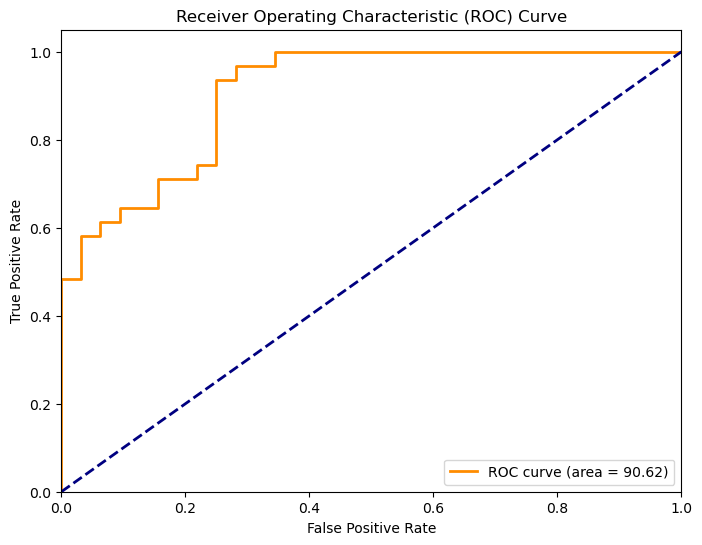

In [115]:
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot